In [2]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [4]:
## X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


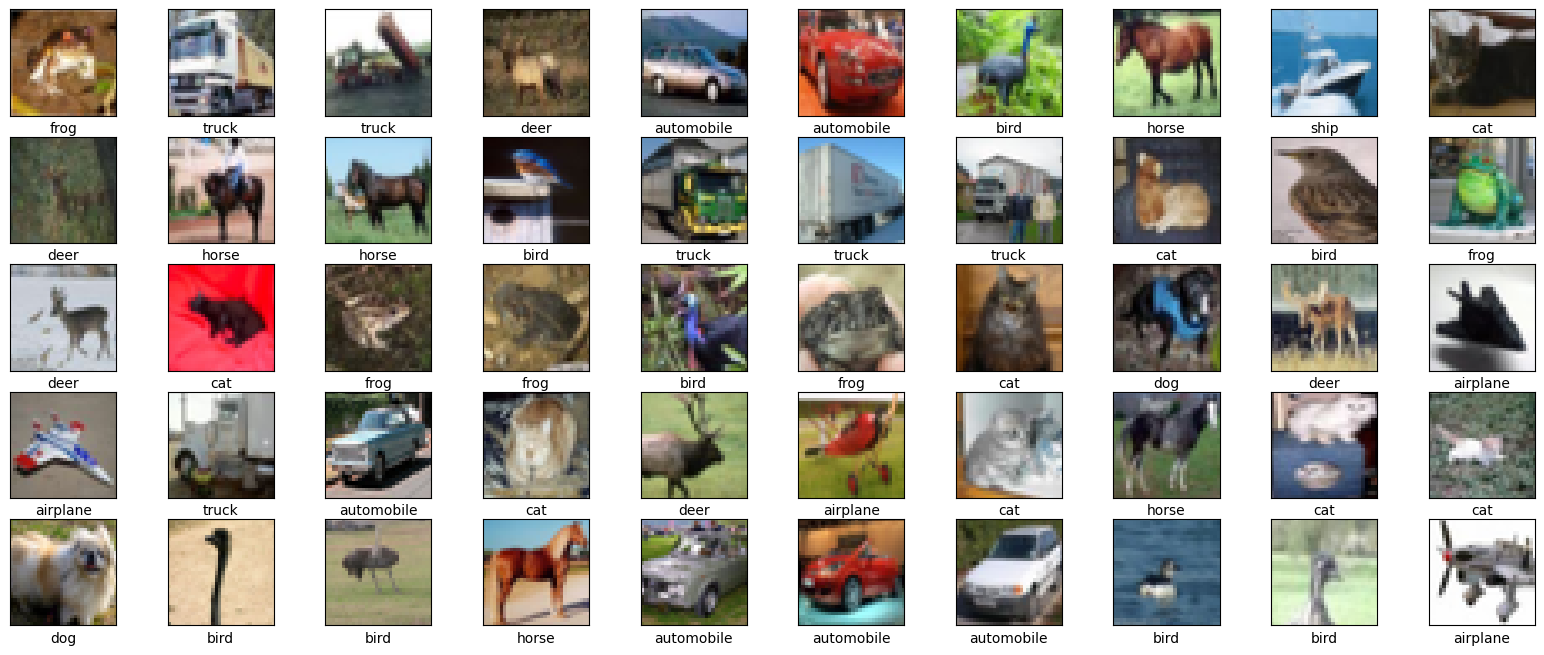

In [6]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()

In [7]:
X_train, X_test = X_train / 255.0, X_test / 255.0


In [8]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),

    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    # layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    # layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [9]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9),
    loss= tf.keras.losses.sparse_categorical_crossentropy,
    metrics= ['accuracy']
)


In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [11]:
h = model.fit(x=X_train, y=Y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
1250/1250 [==============================] - 43s 34ms/step - loss: 1.5481 - accuracy: 0.4383 - val_loss: 1.3310 - val_accuracy: 0.5267
Epoch 2/50
1250/1250 [==============================] - 39s 31ms/step - loss: 1.1997 - accuracy: 0.5748 - val_loss: 1.1153 - val_accuracy: 0.6036
Epoch 3/50
1250/1250 [==============================] - 39s 31ms/step - loss: 1.0435 - accuracy: 0.6338 - val_loss: 1.0509 - val_accuracy: 0.6373
Epoch 4/50
1250/1250 [==============================] - 40s 32ms/step - loss: 0.9496 - accuracy: 0.6686 - val_loss: 0.9886 - val_accuracy: 0.6567
Epoch 5/50
1250/1250 [==============================] - 39s 31ms/step - loss: 0.8707 - accuracy: 0.6974 - val_loss: 1.0623 - val_accuracy: 0.6338
Epoch 6/50
1250/1250 [==============================] - 39s 32ms/step - loss: 0.8098 - accuracy: 0.7180 - val_loss: 1.0006 - val_accuracy: 0.6608
Epoch 7/50
1250/1250 [==============================] - 40s 32ms/step - loss: 0.7564 - accuracy: 0.7347 - val_loss: 0.9434 -

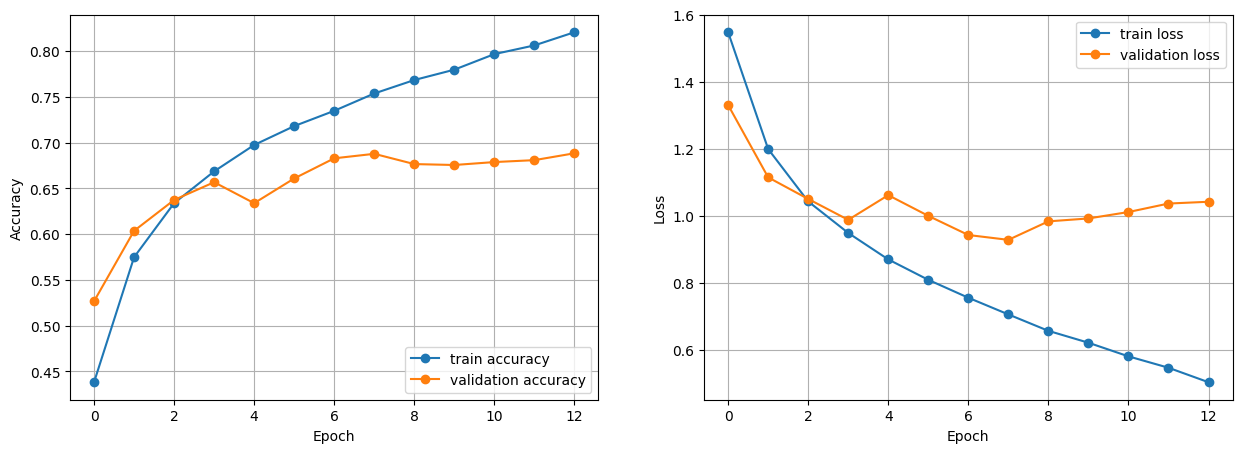

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

Adam:
learning rate : To ensure that the algorithm converges to a good solution, Adam's learning rate is often set to a low number, such as 0.001.
Beta_1: The value of β1 determines how much weight is given to past gradients when computing the moving average.β1 0.9, which means that the moving average is computed using 90% of the previous gradient and 10% of the current gradient.
Early stopping: Early stopping is a regularization technique used in machine learning to avoid overfitting of the model to the training data. It involves monitoring the performance of the model on a validation dataset during training, and stopping the training process early if the performance on the validation dataset does not improve for a certain number of epochs.
Here I have set the patience parameter to 5, which means that if the validation loss does not improve for 5 consecutive epochs, the training process will be stopped early. This helps prevent overfitting by stopping the training process before the model becomes too specialized to the training data.

From the graph we can see that, the epoch has stopped at 12. Which prevent the model from farther training. Which stopping it from getting overfitting.

In [14]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)


313/313 [==============================] - 3s 11ms/step - loss: 0.9496 - accuracy: 0.6840

Test Accuracy: 0.6840000152587891

Test Loss: 0.9495968818664551


In [15]:
predictions = model.predict(X_test)

313/313 [==============================] - 3s 9ms/step


In [16]:
predictions[0]

array([8.8435388e-04, 2.6609725e-04, 7.7916007e-03, 4.8089492e-01,
       1.1683032e-04, 4.1591501e-01, 9.3188040e-02, 1.3794606e-05,
       8.8378647e-04, 4.5469460e-05], dtype=float32)

In [17]:
np.argmax(predictions[0])

3

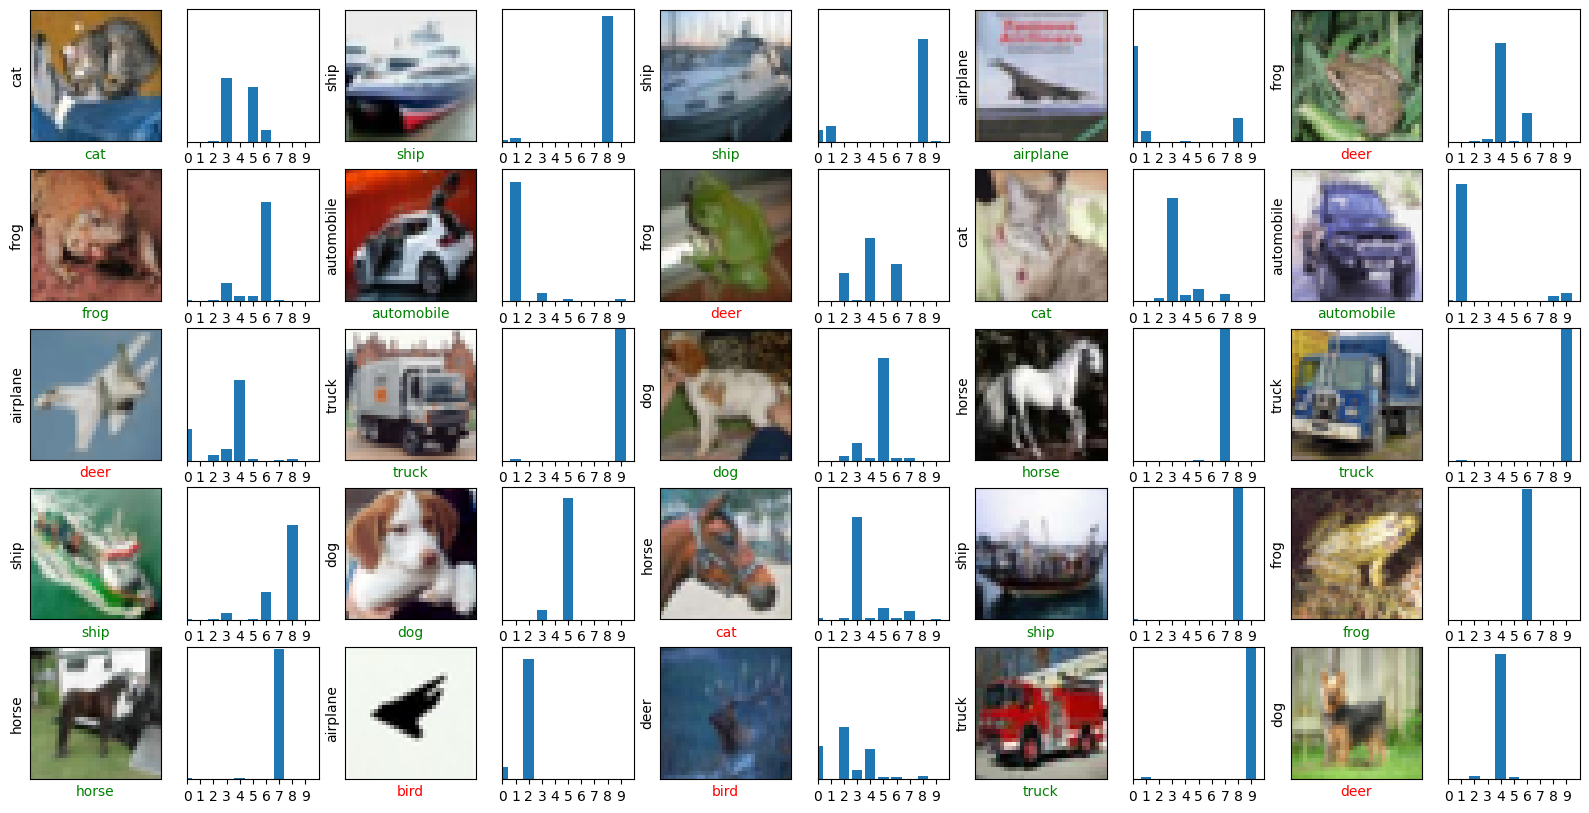

In [18]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):

    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')


    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])

plt.show()

In [18]:
model.compile(
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    loss= tf.keras.losses.sparse_categorical_crossentropy,
    metrics= ['accuracy']
)

In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [20]:
h1 = model.fit(x=X_train, y=Y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
1250/1250 [==============================] - 71s 57ms/step - loss: 0.6719 - accuracy: 0.7659 - val_loss: 0.9703 - val_accuracy: 0.6785
Epoch 2/50
1250/1250 [==============================] - 67s 54ms/step - loss: 0.6519 - accuracy: 0.7718 - val_loss: 0.9708 - val_accuracy: 0.6865
Epoch 3/50
1250/1250 [==============================] - 72s 58ms/step - loss: 0.6376 - accuracy: 0.7775 - val_loss: 0.9669 - val_accuracy: 0.6871
Epoch 4/50
1250/1250 [==============================] - 67s 54ms/step - loss: 0.6258 - accuracy: 0.7812 - val_loss: 0.9339 - val_accuracy: 0.6918
Epoch 5/50
1250/1250 [==============================] - 69s 55ms/step - loss: 0.6119 - accuracy: 0.7854 - val_loss: 0.9585 - val_accuracy: 0.6938
Epoch 6/50
1250/1250 [==============================] - 67s 53ms/step - loss: 0.6011 - accuracy: 0.7909 - val_loss: 0.9495 - val_accuracy: 0.6939
Epoch 7/50
1250/1250 [==============================] - 68s 54ms/step - loss: 0.5952 - accuracy: 0.7922 - val_loss: 0.9521 -

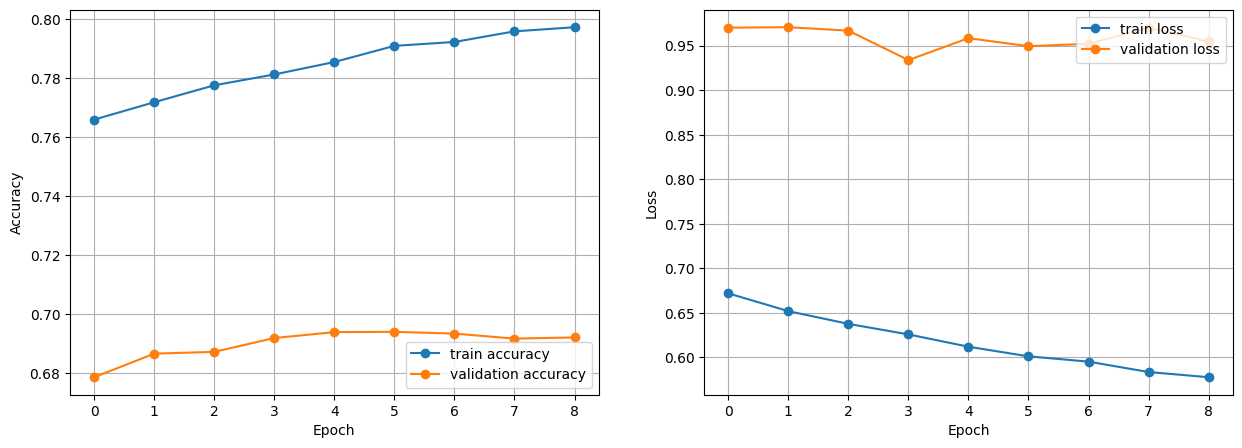

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h1.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h1.history['loss'], 'o-', label='train loss')
plt.plot(h1.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In SGD with momentum, a fraction of the previous gradient is added to the current gradient during each iteration of the optimization algorithm. This has the effect of smoothing out the gradient updates and helps the optimizer to move more quickly in the right direction.

 We can see in the graph that the train accuracy and validation accuracy is moving in parallel, but the validation accuracy is low. Same thing is happening in the train and validation loss graph

In [22]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 5s 15ms/step - loss: 0.9630 - accuracy: 0.6829

Test Accuracy: 0.6829000115394592

Test Loss: 0.9630087614059448


In [23]:
predictions = model.predict(X_test)

313/313 [==============================] - 6s 18ms/step


In [24]:
predictions[0]

array([7.9463786e-03, 4.8536941e-04, 1.0275133e-02, 7.1632153e-01,
       3.7189515e-03, 2.1236068e-01, 5.1162223e-04, 7.6161218e-03,
       4.0206105e-02, 5.5805664e-04], dtype=float32)

In [25]:
np.argmax(predictions[0])

3

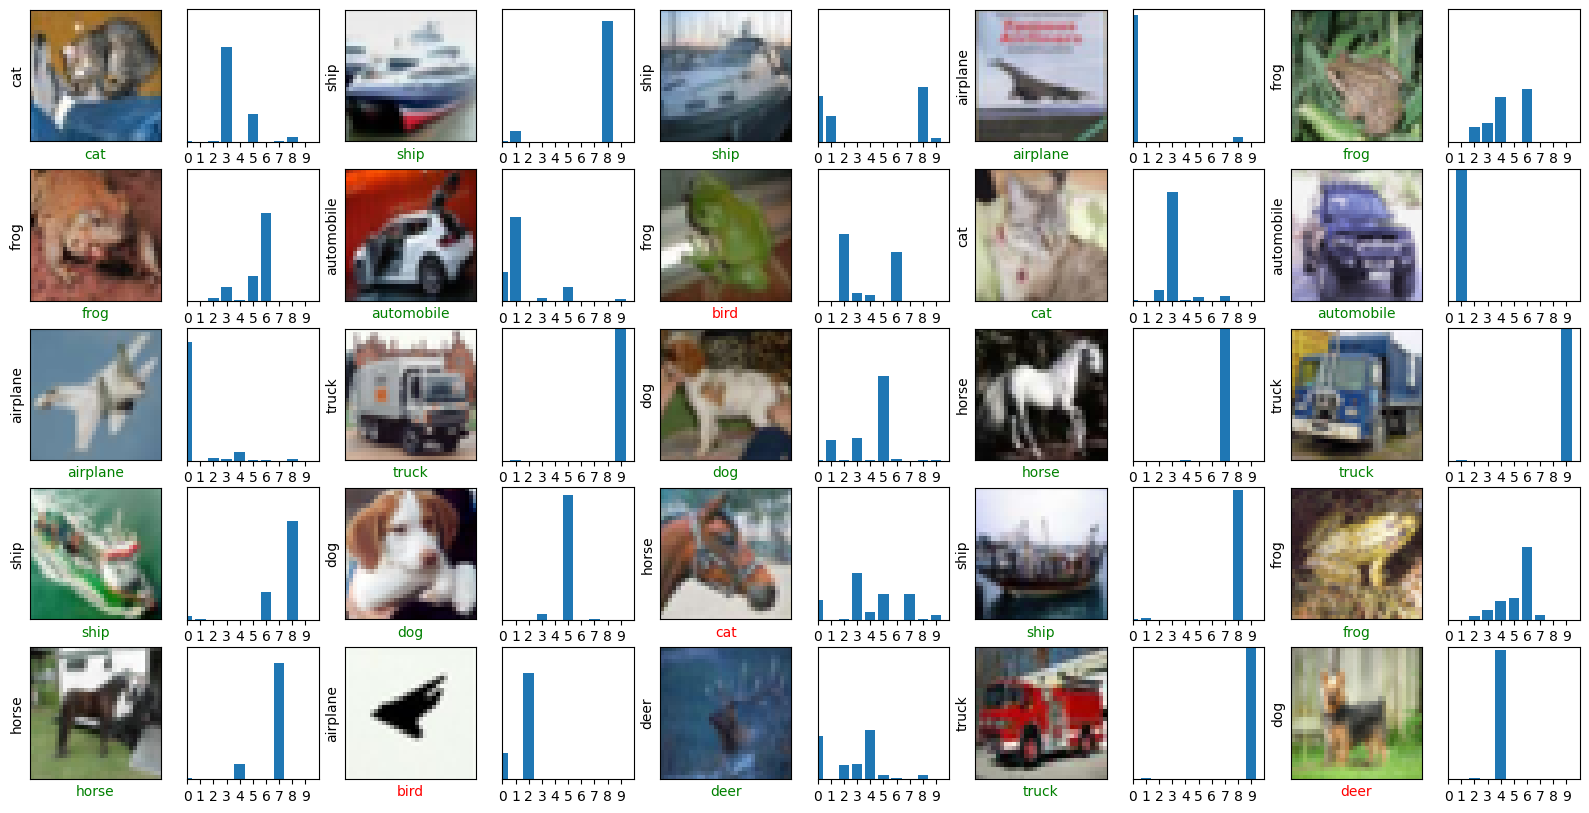

In [26]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):

    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')


    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])

plt.show()

In [30]:
model.compile(
    optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=0.9),
    loss= tf.keras.losses.sparse_categorical_crossentropy,
    metrics= ['accuracy']
)

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [32]:
h2 = model.fit(x=X_train, y=Y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
1250/1250 [==============================] - 71s 55ms/step - loss: 1.8377 - accuracy: 0.3574 - val_loss: 1.7016 - val_accuracy: 0.3965
Epoch 2/50
1250/1250 [==============================] - 66s 53ms/step - loss: 1.6734 - accuracy: 0.4113 - val_loss: 1.6432 - val_accuracy: 0.4513
Epoch 3/50
1250/1250 [==============================] - 65s 52ms/step - loss: 1.6052 - accuracy: 0.4430 - val_loss: 1.6355 - val_accuracy: 0.4489
Epoch 4/50
1250/1250 [==============================] - 67s 54ms/step - loss: 1.5980 - accuracy: 0.4432 - val_loss: 1.6497 - val_accuracy: 0.4190
Epoch 5/50
1250/1250 [==============================] - 66s 53ms/step - loss: 1.5830 - accuracy: 0.4489 - val_loss: 1.6639 - val_accuracy: 0.4057
Epoch 6/50
1250/1250 [==============================] - 67s 53ms/step - loss: 1.5584 - accuracy: 0.4535 - val_loss: 1.5640 - val_accuracy: 0.4646
Epoch 7/50
1250/1250 [==============================] - 65s 52ms/step - loss: 1.5168 - accuracy: 0.4658 - val_loss: 1.5314 -

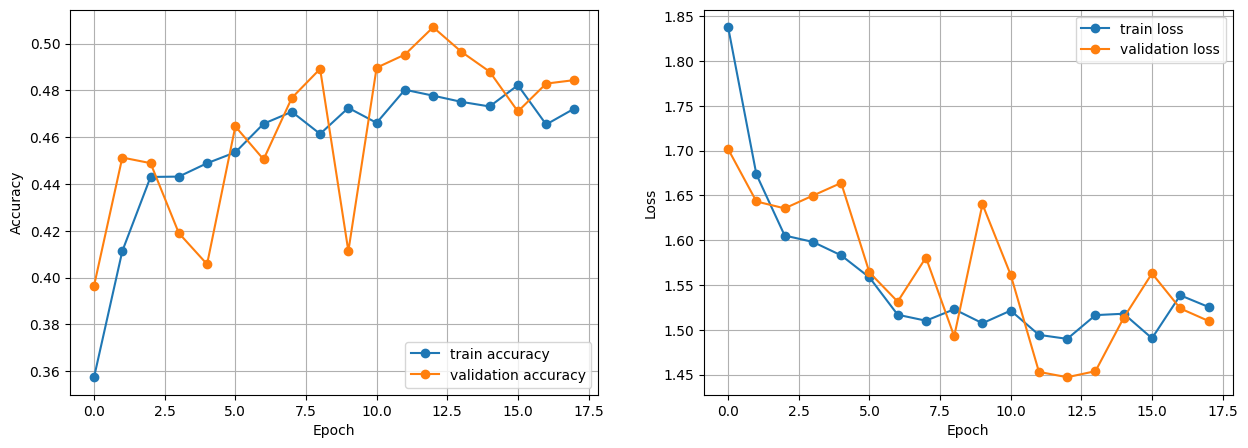

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

here the train accuracy and validation accuracy r fluctuating a lot.. but there is not much of a difference between them.

In [34]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 5s 16ms/step - loss: 1.4437 - accuracy: 0.5020

Test Accuracy: 0.5019999742507935

Test Loss: 1.4436951875686646


In [35]:
predictions = model.predict(X_test)

313/313 [==============================] - 5s 15ms/step


In [36]:
predictions[0]

array([0.01158702, 0.00411387, 0.13571686, 0.258597  , 0.08545544,
       0.3342382 , 0.07382285, 0.06846909, 0.01865433, 0.00934539],
      dtype=float32)

In [37]:
np.argmax(predictions[0])

5

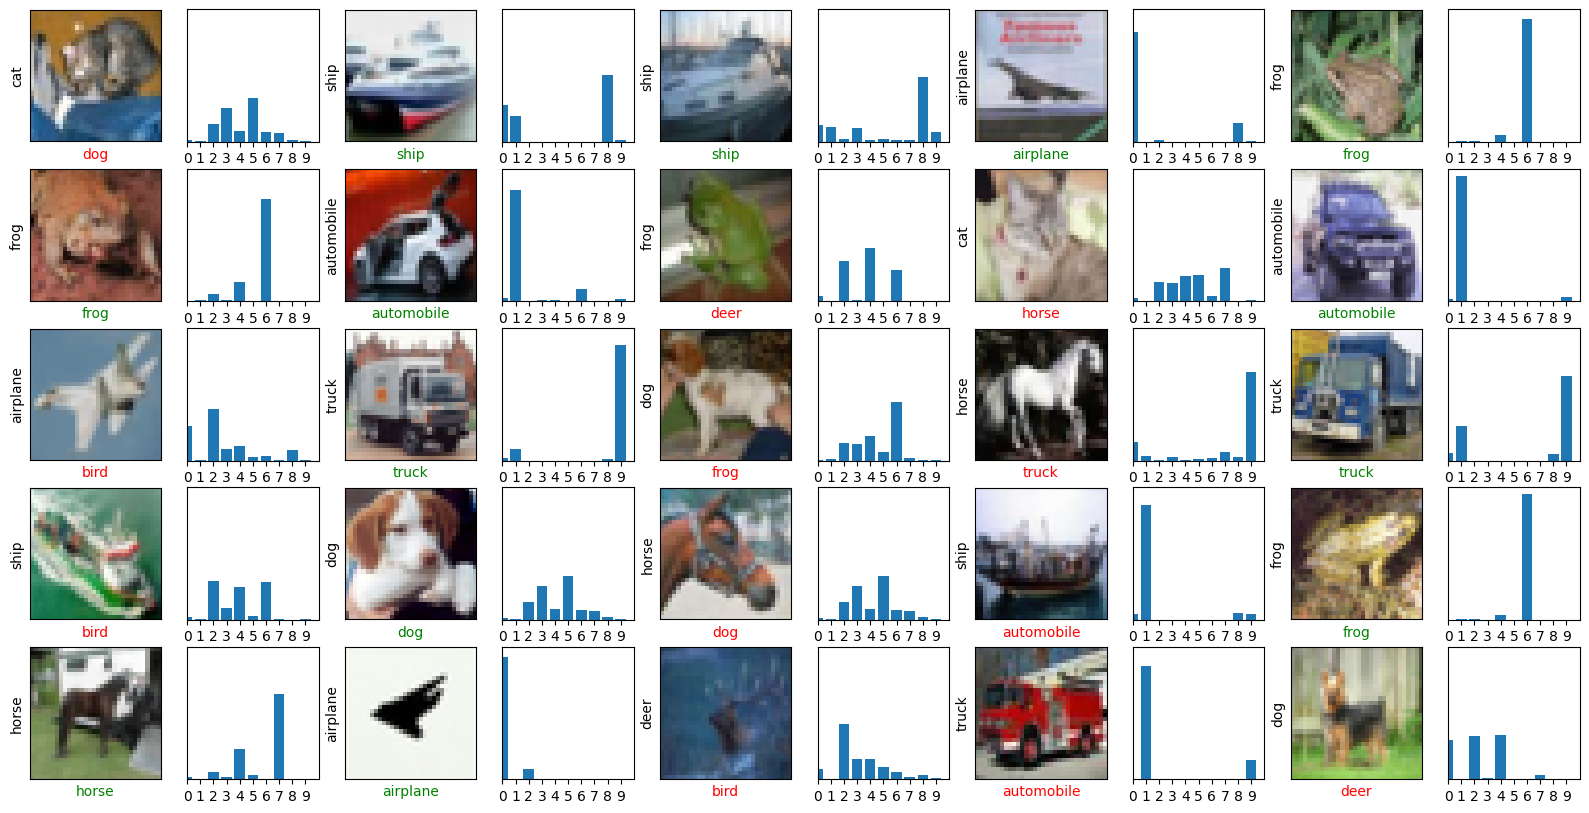

In [38]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):

    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')


    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])

plt.show()

Adam, Sdg, RMSprop test losses are 0.9495968818664551, 0.9630087614059448, 1.4436951875686646. So Adam has the lowest loss and RMSprop has the highest loss. Again test accuracy are 0.6840000152587891, 0.6829000115394592, 0.5019999742507935. Here adam optimizer got the highest accuracy and RMSprop the lowest. So for this model Adam optimizer is working better than other two. And RMSprop is performing poorly
